In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import re

import statsmodels.api as sm

In [ ]:
sns.set(style="darkgrid")
df = pd.read_excel('/content/drive/MyDrive/vnz2019.xlsx')
df = df.drop(0, axis=0)

# Якщо ви хочете оновити індекси після видалення рядка, використовуйте reset_index:
df = df.reset_index(drop=True)
df = df.iloc[:, 1:]
df = df.dropna()
display(df)

,Номер ЄДЕБО,Назва закладу вищої освіти,Область,Середній конкурсний бал зарахованих абітурієнтів,Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням,Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом,"Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу","Студенти, які навчаються за денною формою навчання за державним замовленням","Студенти, які навчаються за заочною формою навчання за державним замовленням","Всього студентів, які навчаються за державним замовленням\n(приведений континент)",...,Разом педагогічний та науково-педагогічний персонал,Всього персоналу,Частка непедагогічного персоналу в загальній кількості персоналу,"Касові видатки по загальному фонду (без капітальних видатків), грн",Середні видатки на одного студента (приведений контингент) за державним замовленням,"Середня кількість студентів, які навчаються за денною формою навчання за державним замовленням, на одного науково-педагогічного працівника","Касові видатки по спеціальному фонду (кошти, отримані від надання платних послуг), грн",Середні видатки на одного студента (приведений контингент) за контрактом,ГРК,КПКВК
0,41,Київський національний університет ім. Тараса ...,м.Київ,181.000,187.000,179.000,181.000,13159,461.0,13205.1,...,1831.25,4792.08,0.617859,1.021629e+09,77366.252425,7.604908,4.537932e+08,70936.222097,МОН,2201280
1,2,Донбаська національна академія будівництва і а...,Донецька область,145.845,153.859,137.830,101.500,294,47.0,298.7,...,68.245,146.745,0.534942,1.811936e+07,60660.732876,5.13582,2.768334e+06,19358.98014,МОН,2201160
2,3,Полтавський національний педагогічний універси...,Полтавська область,150.366,165.897,144.124,122.890,1362,115.0,1373.5,...,222,422.75,0.474867,6.977160e+07,50798.398253,6.692875,2.916887e+07,16322.815719,МОН,2201160
3,7,Національний університет біоресурсів і природо...,м.Київ,150.830,157.640,142.110,137.630,5911,547.0,5965.7,...,905,2003,0.548178,4.360690e+08,73096.032318,6.841435,1.738178e+08,38328.068582,МОН,2201160
4,9,Національний університет водного господарства ...,Рівненська область,157.892,166.495,150.542,139.382,3049,554.0,3104.4,...,454.5,1003,0.546859,1.241610e+08,39995.168148,7.543295,6.731752e+07,37925.362518,МОН,2201160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3781,"ДВНЗ ""Криворізький державний педагогічний унів...",Дніпропетровська область,148.310,153.922,142.699,138.600,1564,175.0,1581.5,...,264.73,585.73,0.548034,7.481985e+07,47309.421435,6.092003,2.540316e+07,28801.773447,МОН,2201160
144,3969,Державний університет інфраструктури та технол...,м.Київ,149.000,159.000,139.000,126.820,737,169.0,753.9,...,147.07,338.67,0.565742,6.746708e+07,89490.754941,6.928645,9.419452e+07,55871.951189,МОН,2201160
156,201,Національний фармацевтичний університет,Харківська область,157.770,188.530,156.770,125.360,64,4.0,64.4,...,7.25,18.5,0.608108,2.986600e+06,46375.776398,8.827586,2.779478e+08,74040.436867,МОЗ,2301070
164,118,Одеська національна музична Академія ім. А.В.Н...,Одеська область,177.600,178.500,156.700,100.000,353,60.0,359.0,...,261.5,411.5,0.36452,5.427350e+07,151179.665738,1.39802,2.276000e+07,116658.117632,МКІП,1801060


In [ ]:
df.shape


(170, 25)

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 25 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                      --------------  -----  
 0   Номер ЄДЕБО                                                                                                                                 170 non-null    int64  
 1   Назва закладу вищої освіти                                                                                                                  170 non-null    object 
 2   Область                                                                                                                                     170 non-null    object 
 3   Середній конкурсний бал зарахованих абітурієн

In [ ]:

df.describe()

,Номер ЄДЕБО,Середній конкурсний бал зарахованих абітурієнтів,Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням,Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом,"Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або цього закладу","Студенти, які навчаються за денною формою навчання за державним замовленням","Студенти, які навчаються за заочною формою навчання за державним замовленням","Всього студентів, які навчаються за державним замовленням\n(приведений континент)","Всього студентів, які навчаються за контрактом\n(приведений континент)",Педагогічний персонал,Науково-педагогічний персонал,Інший персонал,"Касові видатки по загальному фонду (без капітальних видатків), грн","Касові видатки по спеціальному фонду (кошти, отримані від надання платних послуг), грн",КПКВК
count,170.000000,167.000000,168.000000,168.000000,145.000000,170.000000,169.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,1.700000e+02,1.700000e+02
mean,328.441176,154.748541,164.159564,146.519768,136.386867,1929.570588,178.252367,1947.290971,1966.788588,26.469294,290.306912,424.223059,1.085164e+08,7.857762e+07,2.195889e+06
std,721.569910,10.892318,11.758141,11.422747,19.890141,1989.438721,178.361465,1995.518213,1652.214275,34.557596,299.026281,489.641939,1.378973e+08,9.530128e+07,1.393368e+05
min,2.000000,130.830000,135.080000,117.000000,0.000000,33.000000,0.000000,33.400000,50.300000,0.000000,4.800000,3.000000,1.904900e+06,1.839238e+06,1.801060e+06
25%,82.250000,147.145000,155.660000,138.920000,126.480000,878.250000,48.000000,887.225000,829.485000,5.000000,147.200000,196.750000,5.315276e+07,2.302977e+07,2.201160e+06
50%,160.500000,153.600000,164.525000,145.240000,136.910000,1462.000000,133.000000,1485.250000,1568.850000,13.750000,218.400000,302.610000,7.766825e+07,4.303870e+07,2.201160e+06
75%,260.250000,161.310000,172.398750,153.099000,144.200000,2205.000000,270.000000,2238.950000,2542.175000,35.875000,325.842500,456.550000,1.110222e+08,8.699067e+07,2.201160e+06
max,5707.000000,181.000000,188.530000,179.000000,212.100000,14499.000000,972.000000,14531.700000,8117.000000,228.200000,2148.000000,3621.500000,1.149067e+09,5.969221e+08,3.507050e+06


In [ ]:
# Перевірка нульових значень
df.isnull().sum()*100/df.shape[0]
# У наборі даних немає значень NULL, тому він чистий.


Номер ЄДЕБО                                                                                                                                    0.000000
Назва закладу вищої освіти                                                                                                                     0.000000
Область                                                                                                                                        0.000000
Середній конкурсний бал зарахованих абітурієнтів                                                                                               1.764706
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням                                                        1.176471
Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом                                                                   1.176471
Середній бал ЄВІ з іноземної мови випускників закладу, які були зараховані до іншого або

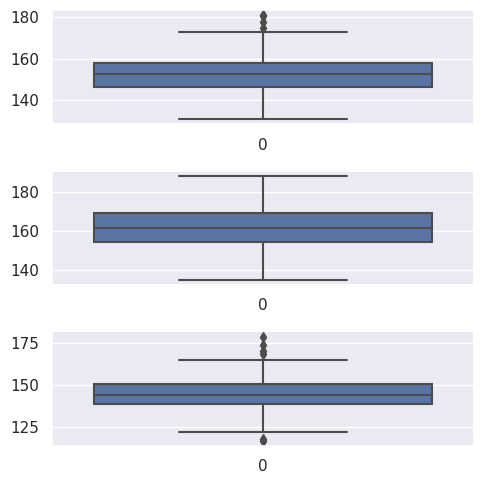

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Середній конкурсний бал зарахованих абітурієнтів'], ax = axs[0])

plt2 = sns.boxplot(df['Середній конкурсний бал зарахованих \nабітурієнтів на навчання за державним замовленням'], ax = axs[1])
plt3 = sns.boxplot(df['Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом'], ax = axs[2])

plt.tight_layout()


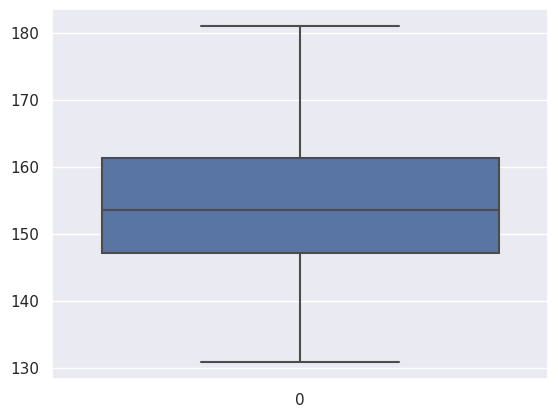

In [ ]:
sns.boxplot(df['Середній конкурсний бал зарахованих абітурієнтів'])
plt.show()


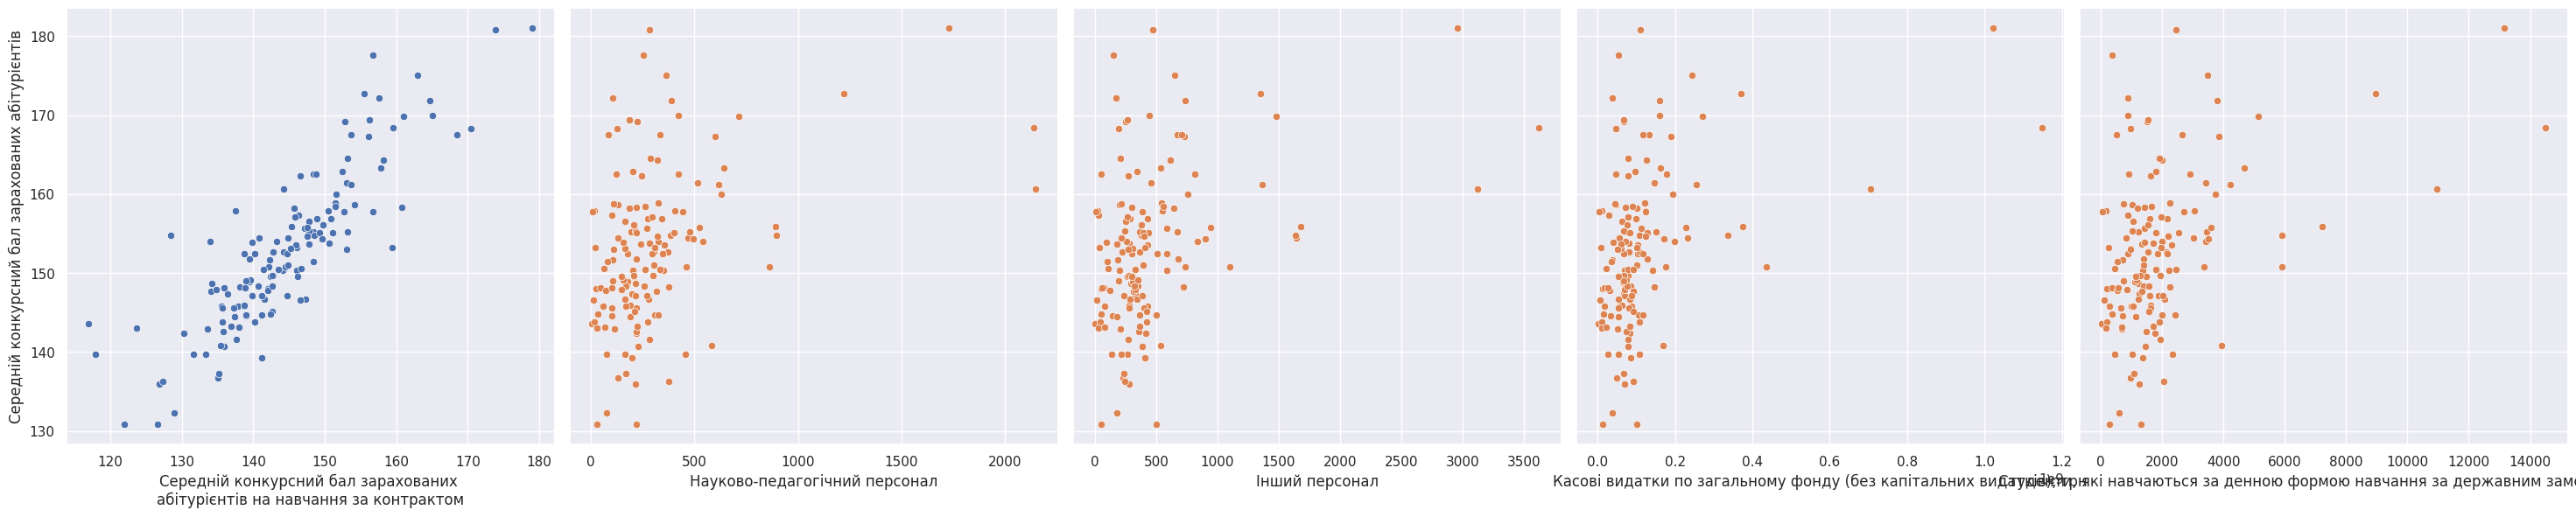

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Збільшимо розмір шрифту
sns.set(font_scale=1)

# Змінимо розмір графіків
g = sns.pairplot(df, x_vars=['Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом', 'Науково-педагогічний персонал', 'Інший персонал', 'Касові видатки по загальному фонду (без капітальних видатків), грн', 'Студенти, які навчаються за денною формою навчання за державним замовленням'],  y_vars='Середній конкурсний бал зарахованих абітурієнтів', height=6, aspect=1, kind='scatter')

# Розмістимо графіки в колонці
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

plt.show()


<ipython-input-35-af992583448f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


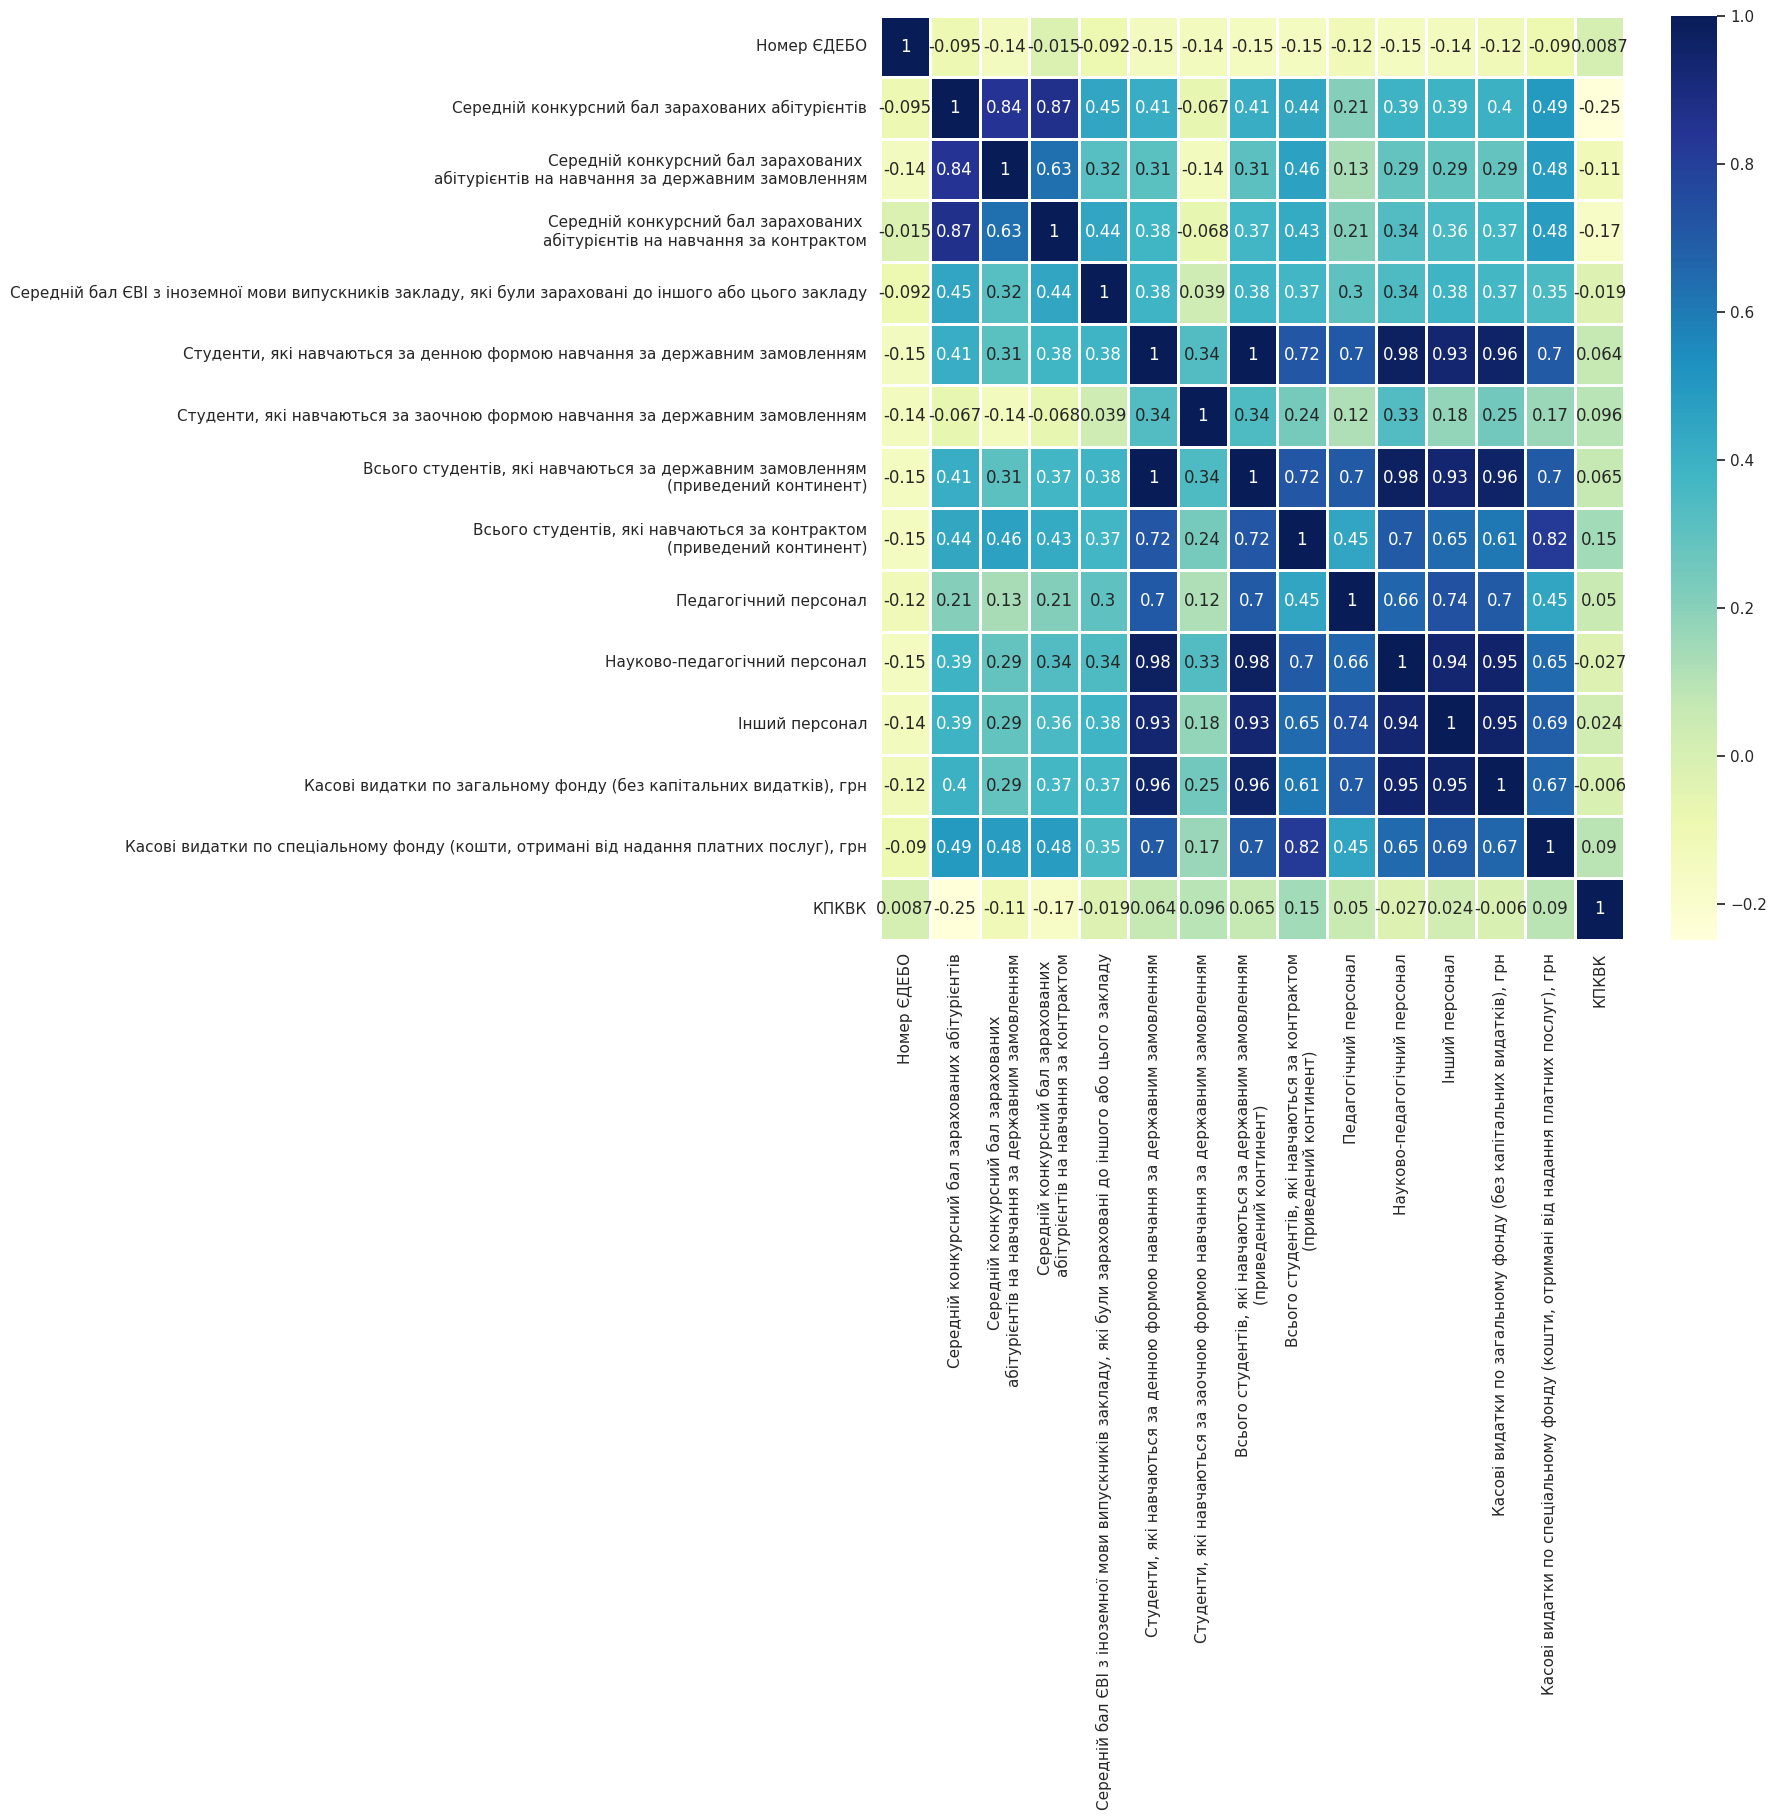

In [ ]:

corr_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths = 0.8)
#plt.title('Теплокарта кореляції')
plt.show()

<ipython-input-36-fcb9d2ac7e22>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


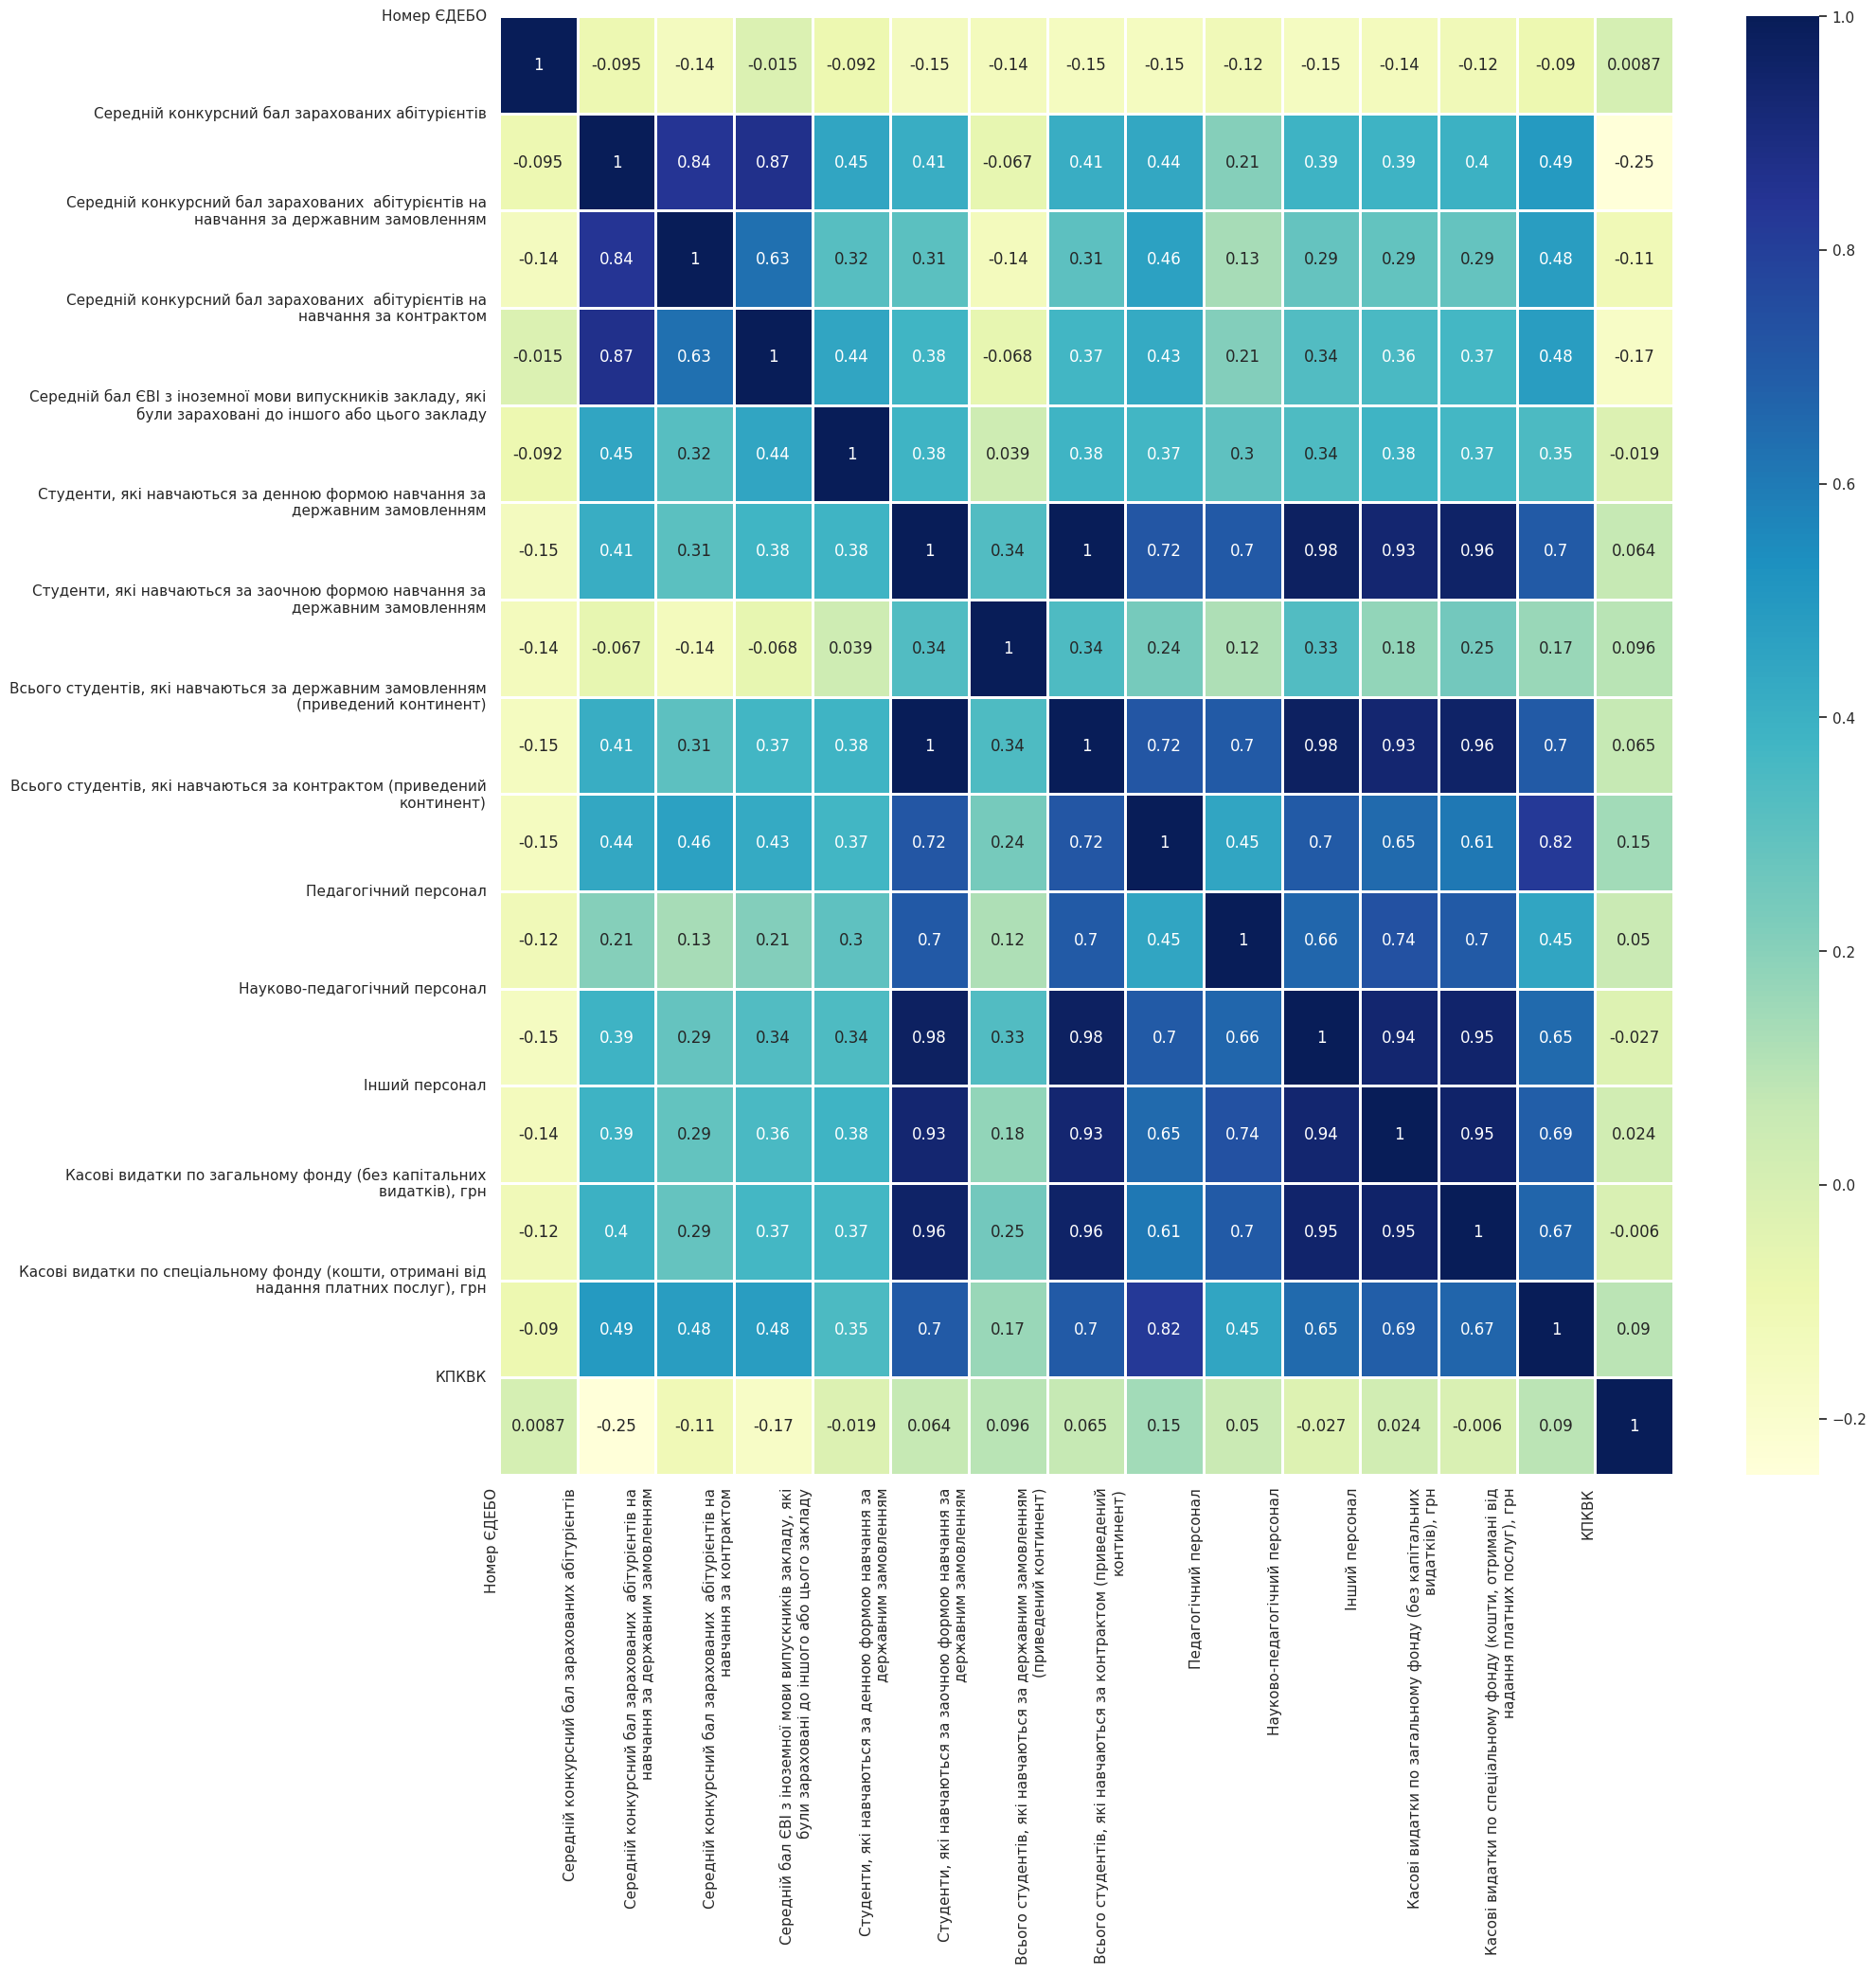

In [ ]:
import textwrap

corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.8)

# Максимальна довжина рядка для підписів (можна налаштувати на свій розсуд)
max_label_length = 60

# Розбиваємо підписи на кілька рядків, якщо вони довші за `max_label_length`
labels = [textwrap.fill(label, max_label_length) for label in corr_matrix.columns]

# Встановлюємо підписи на вісі x та y
plt.xticks(range(len(corr_matrix.columns)), labels, rotation=90, ha="right")
plt.yticks(range(len(corr_matrix.columns)), labels)

#plt.title('Теплокарта кореляції')
plt.show()


In [ ]:
x = df['Середній конкурсний бал зарахованих абітурієнтів']
y = df['Середній конкурсний бал зарахованих \nабітурієнтів на навчання за контрактом']
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y, x_train_sm).fit()
lr.params

const                                               5.847347
Середній конкурсний бал зарахованих абітурієнтів    0.908358
dtype: float64

In [ ]:
print(lr.summary())

                                                         OLS Regression Results                                                        
Dep. Variable:     Середній конкурсний бал зарахованих 
абітурієнтів на навчання за контрактом   R-squared:                       0.748
Model:                                                                                     OLS   Adj. R-squared:                  0.746
Method:                                                                          Least Squares   F-statistic:                     416.1
Date:                                                                         Tue, 24 Oct 2023   Prob (F-statistic):           9.04e-44
Time:                                                                                 15:32:52   Log-Likelihood:                -432.47
No. Observations:                                                                          142   AIC:                             868.9
Df Residuals:                                   

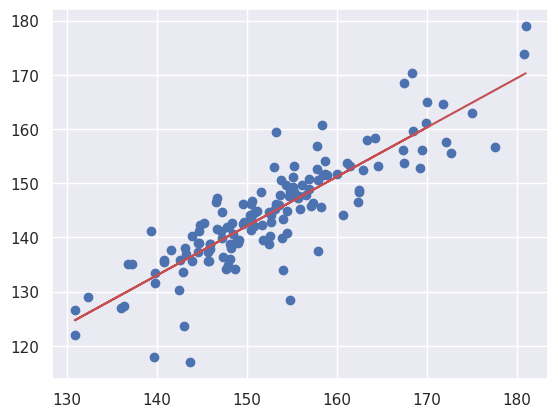

In [ ]:

plt.scatter(x, y)
plt.plot(x, 5.8473   + 0.9084*x, 'r')
plt.show()

In [ ]:

X_m = df[['Науково-педагогічний персонал', 'Інший персонал', 'Касові видатки по загальному фонду (без капітальних видатків), грн']]
y_m = df['Студенти, які навчаються за денною формою навчання за державним замовленням']

X_train_sm_m = sm.add_constant(X_m)
lr_m = sm.OLS(y_m, X_train_sm_m).fit()

lr_m.params

const                                                                 146.409379
Науково-педагогічний персонал                                           4.462619
Інший персонал                                                         -0.124953
Касові видатки по загальному фонду (без капітальних видатків), грн      0.000005
dtype: float64

In [ ]:

print(lr_m.summary())

                                                         OLS Regression Results                                                        
Dep. Variable:     Студенти, які навчаються за денною формою навчання за державним замовленням   R-squared:                       0.963
Model:                                                                                     OLS   Adj. R-squared:                  0.962
Method:                                                                          Least Squares   F-statistic:                     1186.
Date:                                                                         Tue, 24 Oct 2023   Prob (F-statistic):           2.81e-98
Time:                                                                                 15:37:09   Log-Likelihood:                -1054.2
No. Observations:                                                                          142   AIC:                             2116.
Df Residuals:                                   

In [ ]:
const = 146.4094
TV_coeff = 4.4626
Newspaper_coeff = 0.1250
Radio_coeff = 5.083e-06
# Дані
X_sp = df['Науково-педагогічний персонал']
X_op = df['Інший персонал']
X_traty = df['Касові видатки по загальному фонду (без капітальних видатків), грн']
y = df['Студенти, які навчаються за денною формою навчання за державним замовленням']
# Побудова графіків для кожної змінної
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(X_sp, y, color='blue')
plt.plot(X_sp, const + TV_coeff * X_sp, 'r')
plt.title('Науково-педагогічний персонал')
plt.subplot(132)
plt.scatter(X_op, y, color='green')
plt.plot(X_op, const + Newspaper_coeff * X_op, 'r')
plt.title('Інший персонал')
plt.subplot(133)
plt.scatter(X_traty, y, color='red')
plt.plot(X_traty, const + Radio_coeff * X_traty, 'r')
plt.title('Касові видатки по загальному фонду (без капітальних видатків), грн')
plt.show()

NameError: ignored

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Дані
тижні = np.array([1, 2, 3, 4, 5])
обсяг_продажів = np.array([10, 12, 14, 16, 18])

# Створення моделі лінійної регресії
model = LinearRegression()

# Підгонка моделі до даних
model.fit(тижні.reshape(-1, 1), обсяг_продажів)

# Прогноз обсягу продажів для нового тижня (наприклад, тиждень 6)
новий_тижень = np.array([6])
прогноз = model.predict(новий_тижень.reshape(-1, 1))

print(f"Прогноз обсягу продажів на тиждень 6: {прогноз[0]}")


Прогноз обсягу продажів на тиждень 6: 20.0
